# Import Libraries

In [870]:
import os
import cv2
import random
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Fungsi Menampilkan Citra

In [871]:
# Fungsi untuk menampilkan citra
def show_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()



# Model K-Means

In [872]:
def kmeans_segmentation(image, k):
    # Jika citra berwarna
    if len(image.shape) == 3:
        pixels = image.reshape((-1, 3))
    # Jika citra grayscale
    elif len(image.shape) == 2:
        pixels = image.reshape((-1, 1))
    else:
        raise ValueError("Bentuk citra tidak didukung")

    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(pixels)
    
    # Gunakan dimensi citra asli
    segmented_image = kmeans.labels_.reshape(image.shape[:2])
    return segmented_image

# Pembacaan Data Citra

In [873]:
# Direktori dataset
dataset_dir = 'data/img'

# Pilih 5 citra plat nomor secara acak dari seluruh dataset
all_image_files = []
for root, dirs, files in os.walk(dataset_dir):
    all_image_files.extend([os.path.join(root, file) for file in files])

# Pilih secara acak 5 citra plat nomor
selected_images = random.sample(all_image_files, 5)

# Cetak Data Citra

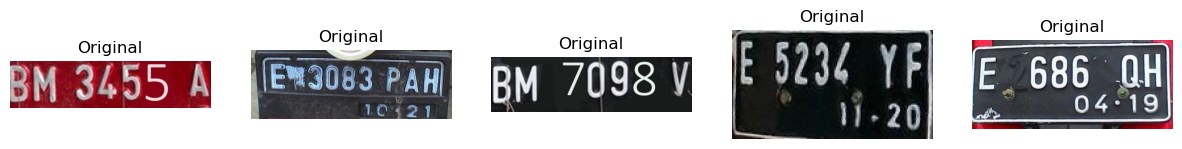

In [874]:
# Muat dan tampilkan citra-citra yang dipilih sebelum segmentasi
original_images = [cv2.imread(img) for img in selected_images]

# Menampilkan citra asli dengan judul "Original" (dalam format RGB)
fig, axes = plt.subplots(1, len(original_images), figsize=(15, 5))
for ax, image in zip(axes, original_images):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title('Original')
    ax.axis('off')
plt.show()

# Pre-Processing

In [875]:
# Pra-pemrosesan: Merubah color space menjadi grayscale
grayscale_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in original_images]

# Pra-pemrosesan: Reduksi dimensi menggunakan PCA
pca = PCA(n_components=3)
reduced_images = [pca.fit_transform(img.reshape((-1, 3))).reshape(img.shape) for img in original_images]

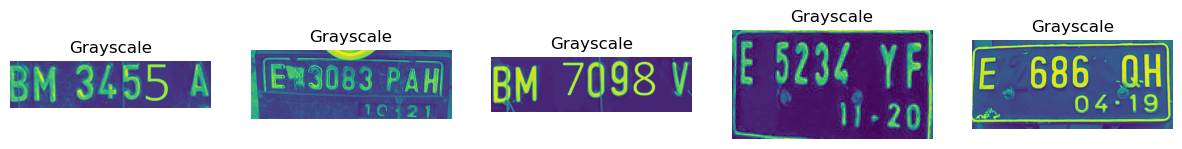

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


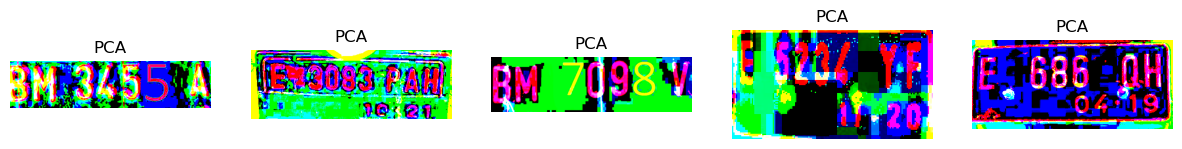

In [876]:
show_images(grayscale_images, titles=['Grayscale']*len(grayscale_images))
show_images(reduced_images, titles=['PCA']*len(reduced_images))

# Proses Segmentasi

In [877]:
# Lakukan segmentasi pada citra-citra yang telah di-preprocess
segmented_images_gray = [kmeans_segmentation(img, 2) for img in grayscale_images]

In [878]:
# Lakukan segmentasi pada citra-citra yang telah di-preprocess
segmented_images_pca = [kmeans_segmentation(img, 2) for img in reduced_images]

# Hasil Segementasi

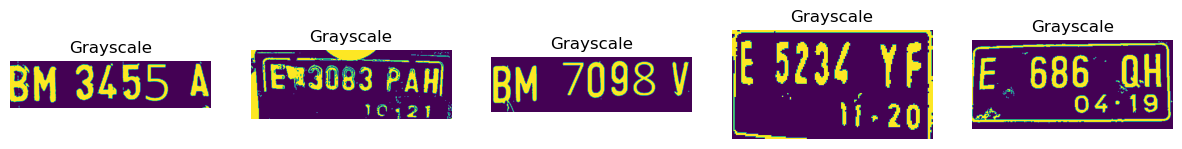

In [879]:
# Tampilkan perbandingan citra sebelum dan sesudah segmentasi
show_images(segmented_images_gray,['Grayscale']*len(segmented_images_gray))

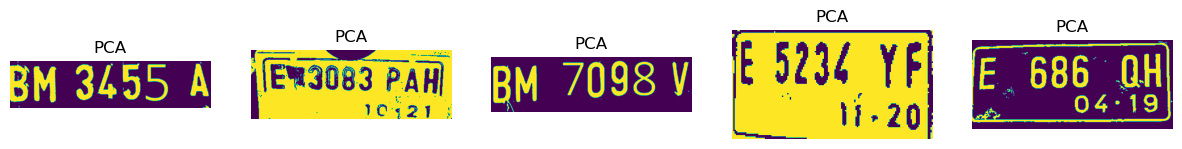

In [880]:
# Tampilkan perbandingan citra sebelum dan sesudah segmentasi
show_images(segmented_images_pca,['PCA']*len(segmented_images_pca))